In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sn

import warnings
warnings = warnings.filterwarnings('ignore')

In [3]:
# importing the dataset
mldata = pd.read_csv('ehresp_2015.csv')
mldata.head(5)

,TUCASEID,TULINENO,EEINCOME1,ERBMI,ERHHCH,ERINCOME,ERSPEMCH,ERTPREAT,ERTSEAT,ETHGT,...,EUMEAT,EUMILK,EUPRPMEL,EUSODA,EUSTORES,EUSTREASON,EUTHERM,EUWGT,EUWIC,EXINCOME1
0,20150101150018,1,1,31.4,3,1,-1,50,0,0,...,1,2,1,2,-1,-1,2,161,2,0
1,20150101150053,1,2,25.7,3,3,-1,120,0,0,...,1,2,1,-1,1,2,2,195,-1,0
2,20150101150071,1,1,29.6,3,1,-1,50,-2,0,...,1,2,1,2,-1,-1,2,178,-1,0
3,20150101150146,1,3,23.4,3,2,5,95,30,0,...,1,2,1,1,1,4,2,132,-1,0
4,20150101150147,1,1,35.9,1,1,5,140,5,0,...,1,2,1,1,1,1,2,250,-1,0


In [4]:
mldata.columns

Index(['TUCASEID', 'TULINENO', 'EEINCOME1', 'ERBMI', 'ERHHCH', 'ERINCOME',
       'ERSPEMCH', 'ERTPREAT', 'ERTSEAT', 'ETHGT', 'ETWGT', 'EUDIETSODA',
       'EUDRINK', 'EUEAT', 'EUEXERCISE', 'EUEXFREQ', 'EUFASTFD', 'EUFASTFDFRQ',
       'EUFFYDAY', 'EUFDSIT', 'EUFINLWGT', 'EUSNAP', 'EUGENHTH', 'EUGROSHP',
       'EUHGT', 'EUINCLVL', 'EUINCOME2', 'EUMEAT', 'EUMILK', 'EUPRPMEL',
       'EUSODA', 'EUSTORES', 'EUSTREASON', 'EUTHERM', 'EUWGT', 'EUWIC',
       'EXINCOME1'],
      dtype='object')

In [5]:
mldata_subset = mldata[['ERBMI','ERINCOME','EUEXFREQ','EUFASTFDFRQ',]]

In [6]:
mldata_subset.head(5)

,ERBMI,ERINCOME,EUEXFREQ,EUFASTFDFRQ
0,31.4,1,5,-1
1,25.7,3,4,2
2,29.6,1,-1,2
3,23.4,2,6,1
4,35.9,1,-1,5


In [7]:
mldata_subset.shape

(10626, 4)

In [8]:
mldata_subset.isnull().sum()

ERBMI          0
ERINCOME       0
EUEXFREQ       0
EUFASTFDFRQ    0
dtype: int64

ERBMI             AxesSubplot(0.125,0.536818;0.352273x0.343182)
ERINCOME       AxesSubplot(0.547727,0.536818;0.352273x0.343182)
EUEXFREQ             AxesSubplot(0.125,0.125;0.352273x0.343182)
EUFASTFDFRQ       AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

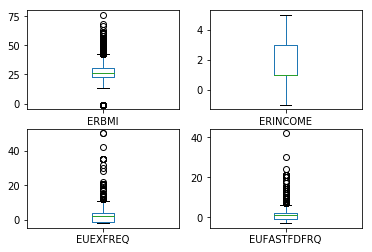

In [9]:
mldata_subset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(6, 4))

### outlier detection

In [10]:
from scipy import stats

In [11]:
z = np.abs(stats.zscore(mldata_subset))
print(z)

[[0.57219317 0.60204768 0.79956535 0.82537295]
 [0.07283845 0.60477342 0.50311799 0.35657031]
 [0.36849897 0.60204768 0.97911883 0.35657031]
 ...
 [0.18743747 0.60204768 0.79956535 1.53851357]
 [1.70382758 0.60204768 0.08977674 0.82537295]
 [0.94563252 0.60477342 0.20667063 0.35657031]]


In [12]:
threshold = 2
print(np.where(z>2))

(array([    5,    12,    21, ..., 10596, 10601, 10604], dtype=int64), array([2, 0, 0, ..., 2, 0, 0], dtype=int64))


### filtering out outliers using z score method


In [13]:
mldata_subset_no_outliers = mldata_subset[(z<2).all(axis=1)]

In [14]:
mldata_subset_no_outliers.shape

(9309, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E59F055EF0>,
      dtype=object)

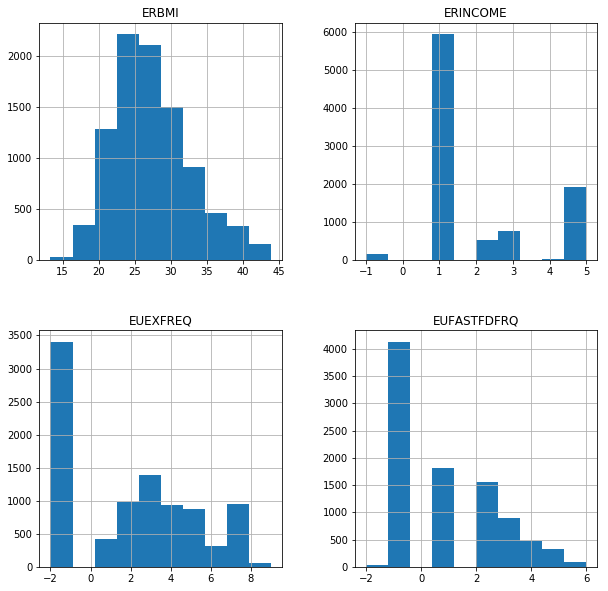

In [15]:
mldata_subset_no_outliers.hist(figsize = (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E59F9DFA58>,
      dtype=object)

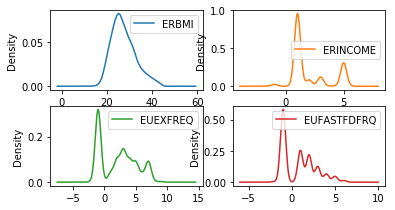

In [16]:
mldata_subset_no_outliers.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(6, 5))

ERBMI             AxesSubplot(0.125,0.657941;0.352273x0.222059)
ERINCOME       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
EUEXFREQ          AxesSubplot(0.125,0.391471;0.352273x0.222059)
EUFASTFDFRQ    AxesSubplot(0.547727,0.391471;0.352273x0.222059)
dtype: object

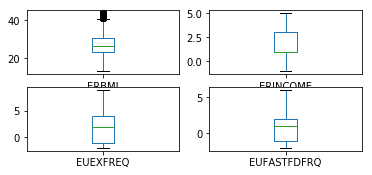

In [17]:
mldata_subset_no_outliers.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(6, 4))

### add an OVERWEIGHT indicator column


In [18]:
mldata_subset_no_outliers['OVERWEIGHT'] = np.where(mldata_subset_no_outliers.ERBMI > 25.0, 1, 0)

In [19]:
mldata_subset_no_outliers.head(5)

,ERBMI,ERINCOME,EUEXFREQ,EUFASTFDFRQ,OVERWEIGHT
0,31.4,1,5,-1,1
1,25.7,3,4,2,1
2,29.6,1,-1,2,1
3,23.4,2,6,1,0
4,35.9,1,-1,5,1


In [20]:
cols = list(mldata_subset_no_outliers)
cols[0], cols[3] = cols[3], cols[0]
cols


['EUFASTFDFRQ', 'ERINCOME', 'EUEXFREQ', 'ERBMI', 'OVERWEIGHT']

In [21]:
mldata_subset_no_outliers.ix[:, cols]

,EUFASTFDFRQ,ERINCOME,EUEXFREQ,ERBMI,OVERWEIGHT
0,-1,1,5,31.4,1
1,2,3,4,25.7,1
2,2,1,-1,29.6,1
3,1,2,6,23.4,0
4,5,1,-1,35.9,1
6,-1,1,-1,30.1,1
7,1,1,4,33.9,1
8,3,5,1,26.3,1
9,3,1,7,22.6,0
10,-1,2,-1,28.3,1


### distribution of the overweight

In [22]:
mldata_subset_no_outliers['OVERWEIGHT'].value_counts(normalize=True)

1    0.628854
0    0.371146
Name: OVERWEIGHT, dtype: float64

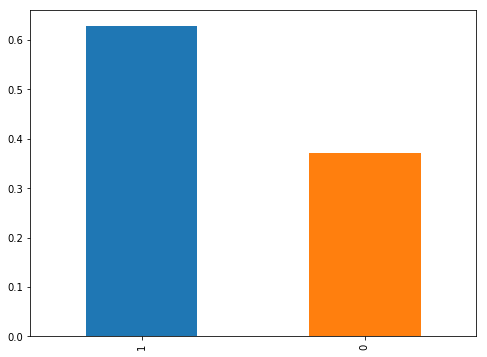

In [23]:
mldata_subset_no_outliers['OVERWEIGHT'].value_counts(normalize=True).plot.bar(figsize=(8, 6))

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### Regression Models

In [25]:
X = mldata_subset_no_outliers.drop(mldata_subset_no_outliers[['ERBMI', 'OVERWEIGHT']], 1)
y1 = mldata_subset_no_outliers.ERBMI
y2 = mldata_subset_no_outliers.OVERWEIGHT

In [26]:
kfold = KFold(n_splits=10, random_state=8)
Multiple_linReg_model = LinearRegression()
results = cross_val_score(Multiple_linReg_model, X, y1, cv=kfold, scoring='r2')
print('R-squared mean of the model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results.mean(), results.std()))

R-squared mean of the model is: 0.031 and its mean standard deviation is: 0.013


In [27]:
KNN_regressor = KNeighborsRegressor()
results1 = cross_val_score(KNN_regressor, X, y1, cv=kfold, scoring='r2')
print('R-squared mean of the model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results1.mean(), results1.std()))

R-squared mean of the model is: -0.167 and its mean standard deviation is: 0.076


In [28]:
decision_tree_model = DecisionTreeRegressor()
results1a = cross_val_score(decision_tree_model, X, y1, cv=kfold, scoring='r2')
print('R-squared mean of the model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results1a.mean(), results1a.std()))

R-squared mean of the model is: 0.011 and its mean standard deviation is: 0.017


In [29]:
svr_model = SVR()
results1b = cross_val_score(svr_model, X, y1, cv=kfold, scoring='r2')
print('R-squared mean of the model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results1b.mean(), results1b.std()))

R-squared mean of the model is: 0.010 and its mean standard deviation is: 0.016


In [30]:
RF_regressor = RandomForestRegressor()
results1c = cross_val_score(RF_regressor, X, y1, cv=kfold, scoring='r2')
print('R-squared mean of the model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results1c.mean(), results1c.std()))

R-squared mean of the model is: 0.012 and its mean standard deviation is: 0.016


### classification model


In [31]:
Logit_model = LogisticRegression()
results2 = cross_val_score(Logit_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the logistic model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results2.mean(), results2.std()))

accuracy of the logistic model is: 0.629 and its mean standard deviation is: 0.016


In [32]:
KNN_classifier = KNeighborsClassifier(n_neighbors=5)
results3 = cross_val_score(KNN_classifier, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the KNN model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results3.mean(), results3.std()))

accuracy of the KNN model is: 0.582 and its mean standard deviation is: 0.020


In [33]:
naive_model = GaussianNB()
results4 = cross_val_score(naive_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the naive bayes model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4.mean(), results4.std()))

accuracy of the naive bayes model is: 0.626 and its mean standard deviation is: 0.015


In [34]:
decision_tree_cls = DecisionTreeClassifier()
results4a = cross_val_score(decision_tree_cls, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the naive bayes model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4a.mean(), results4a.std()))

accuracy of the naive bayes model is: 0.620 and its mean standard deviation is: 0.019


In [35]:
svc_model = SVC()
results4c = cross_val_score(svc_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the naive bayes model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4c.mean(), results4c.std()))

accuracy of the naive bayes model is: 0.627 and its mean standard deviation is: 0.018


In [36]:
RF_classifier = RandomForestClassifier()
results4c = cross_val_score(RF_classifier, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the naive bayes model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4c.mean(), results4c.std()))

accuracy of the naive bayes model is: 0.621 and its mean standard deviation is: 0.018


In [37]:
print(results4c)

[0.63480129 0.63372718 0.61117078 0.59613319 0.59935553 0.59828142
 0.64017186 0.650913   0.62191192 0.61935484]


In [38]:
from sklearn.ensemble import AdaBoostClassifier


In [39]:
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=8)
results4d = cross_val_score(adaboost_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the Adda boost model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4d.mean(), results4d.std()))

accuracy of the Adda boost model is: 0.631 and its mean standard deviation is: 0.018


In [40]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
GradientBoosting_model = GradientBoostingClassifier(n_estimators=50, random_state=8)
results4e = cross_val_score(GradientBoosting_model, X, y2, cv=kfold, scoring='accuracy')
print('accuracy of the stochastic gradient boost model is: {:.3f} and its mean standard deviation is: {:.3f}'. format(results4e.mean(), results4e.std()))

accuracy of the stochastic gradient boost model is: 0.631 and its mean standard deviation is: 0.017


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.25, random_state = 10)

In [44]:
X_train.head()

,ERINCOME,EUEXFREQ,EUFASTFDFRQ
2126,1,7,-1
1247,1,7,1
8747,3,-1,6
284,1,3,3
4718,1,-1,-1


In [45]:
y_train.head()

2126    0
1247    0
8747    1
284     1
4718    1
Name: OVERWEIGHT, dtype: int32

In [46]:
logit2 = LogisticRegression()
logit2.fit(X_train, y_train)
print('accuracy of logit2 training: {:.3f}'.format(logit2.score(X_train, y_train)))
print('accuracy of logit2 test data: {:.3f}'.format(logit2.score(X_test, y_test)))

accuracy of logit2 training: 0.632
accuracy of logit2 test data: 0.621


In [47]:
THRESHOLD = 0.50

In [48]:
logit2_pred = np.where(logit2.predict_proba(X_test)[:,1]>THRESHOLD, 1, 0)
confusion_matrix(y_test, logit2_pred)

array([[  11,  873],
       [  10, 1434]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logit2_pred)


0.6207044673539519

In [50]:
from sklearn.metrics import roc_auc_score,roc_curve

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, logit2_pred)

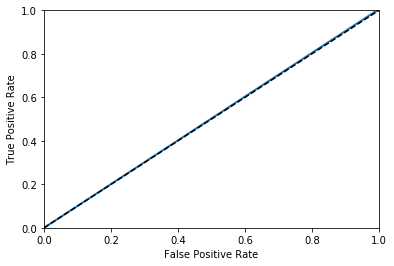

In [52]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()